# Student Performance Indicator

 Life Cycle of Machine Learning :

1. Understanding Problem Statement
2. Data Collection
3. Data Checks to perform 
4. EDA (Exploratory Data Analysis)
5. Data Preprocessing
6. Model Training
7. Choose Best Model

# Importing Data and Required Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("/workspaces/ML-Projects/notebook/StudentsPerformance.csv")

In [4]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [5]:
data.shape

(1000, 8)

Dataset contains 1000 Rows and 8 columns.

In [6]:
data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Dataset contains 8 columns such as gender, race_ethnicity,parental_level_of_education, lunch, test_preparation_course, math_score, reading_score, writing_score

## Dataset Information 

1. gender : sex of students -> (Male/female)
2. race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
3. parental level of education : parents' final education ->(bachelor's degree,some college,master's  degree,associate's degree,high school)
4. lunch : having lunch before test (standard or free/reduced)
5. test preparation course : complete or not complete before test
6. math score
7. reading score
8. writing score

# Steps : 
1. Check Missing values
2. Check Duplicates
3. Check data type
4. Check the number of unique values of each column
5. Check statistics of data set
6. Check various categories present in the different categorical column

# Checking Missing Values

In [7]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are No Missing Values in the dataset.

# Checking Duplicates

In [8]:
data.duplicated().sum()

0

There are No Duplicate Values in the dataset.

# Checking Data Types

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Gender, race_ethnicity, parental_level_of_education, lunch, test_preparaton_course are Object Dtype
and Math_score, reading_score, writing_score are int Dtype.

# Checking the No.of Unique Values in the dataset

In [10]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [11]:
data.nunique().sum()

247

Total 247 Unique Values present in the dataset.

# Checking the statistics of dataset

In [12]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights :

1. From above Statistics, mean for math_score, reading_score, writing_score close to each other - between 66 to 68.
2. standard Deviation is also close to each other - between 14 to 15.
3. Minimum value is 0 for math_score and Maximum Value is 100 for all three.

# Exploring the dataset

In [13]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
print("Categories in 'Gender' Variable:    ",end=" ")
print(data['gender'].unique())
print("Categories in 'race_ethnicity' Variable:    ",end=" ")
print(data['race/ethnicity'].unique())
print("Categories in 'parental_level_of_education' Variable:    ",end=" ")
print(data['parental level of education'].unique())
print("Categories in 'lunch' Variable:    ",end=" ")
print(data['lunch'].unique())
print("Categories in 'test_preparation_course' Variable:    ",end=" ")
print(data['test preparation course'].unique())


Categories in 'Gender' Variable:     ['female' 'male']
Categories in 'race_ethnicity' Variable:     ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' Variable:     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' Variable:     ['standard' 'free/reduced']
Categories in 'test_preparation_course' Variable:     ['none' 'completed']


Define Numerical and Categorical features

In [15]:
numerical_features=[feature for feature in data.columns if data[feature].dtype != 'O']
Categorical_features=[feature for feature in data.columns if data[feature].dtype == 'O']
print("Numerical Features are {}".format(numerical_features))
print("Categorical Features are {}".format(Categorical_features))

Numerical Features are ['math score', 'reading score', 'writing score']
Categorical Features are ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


# Adding columns : Total_score and Average_score

In [16]:
data['total score']=data['math score']+data['reading score']+data['writing score']
data['average']=data['total score']/3

In [17]:
data.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


# No.of Students with Full Marks in math_score, reading_score, writing_score

In [18]:
math_full=data[data['math score']==100]['average'].count()
reading_full=data[data['reading score']==100]['average'].count()
writing_full=data[data['writing score']==100]['average'].count()

print("Number of Students with Full marks in Math_score : {}".format(math_full))
print("Number of Students with Full marks in reading_score : {}".format(reading_full))
print("Number of Students with Full marks in writing_score : {}".format(writing_full))


Number of Students with Full marks in Math_score : 7
Number of Students with Full marks in reading_score : 17
Number of Students with Full marks in writing_score : 14


# Data Visualization

<Axes: xlabel='average', ylabel='Count'>

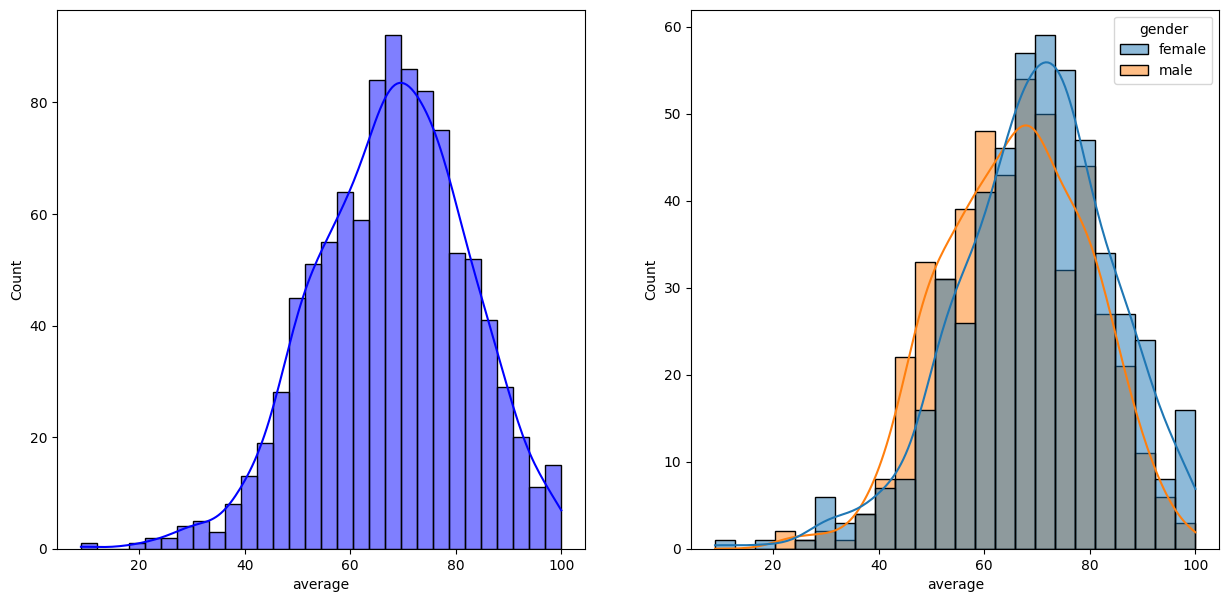

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data,x='average',bins=30,kde=True,color='blue')
plt.subplot(122)
sns.histplot(data,x='average',kde=True,hue='gender')

<Axes: xlabel='total score', ylabel='Count'>

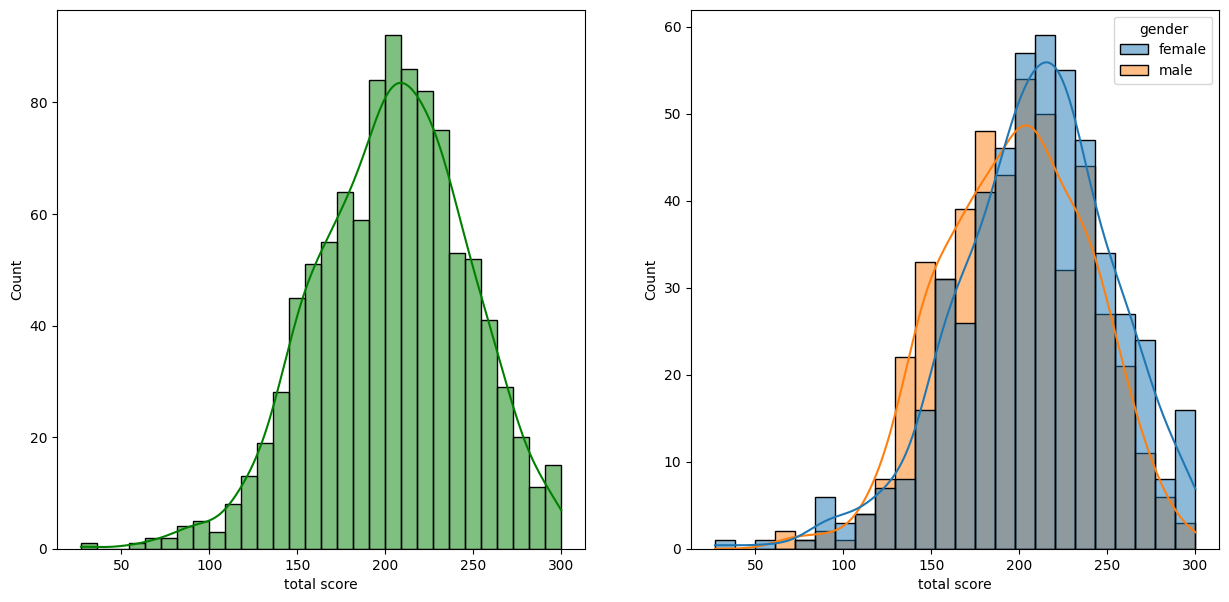

In [20]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=data,x='total score',bins=30,kde=True,color='green')
plt.subplot(122)
sns.histplot(data=data,x='total score',kde=True,hue='gender')

Insights : Female Students perform well in exam then male students.

<Axes: xlabel='average', ylabel='Count'>

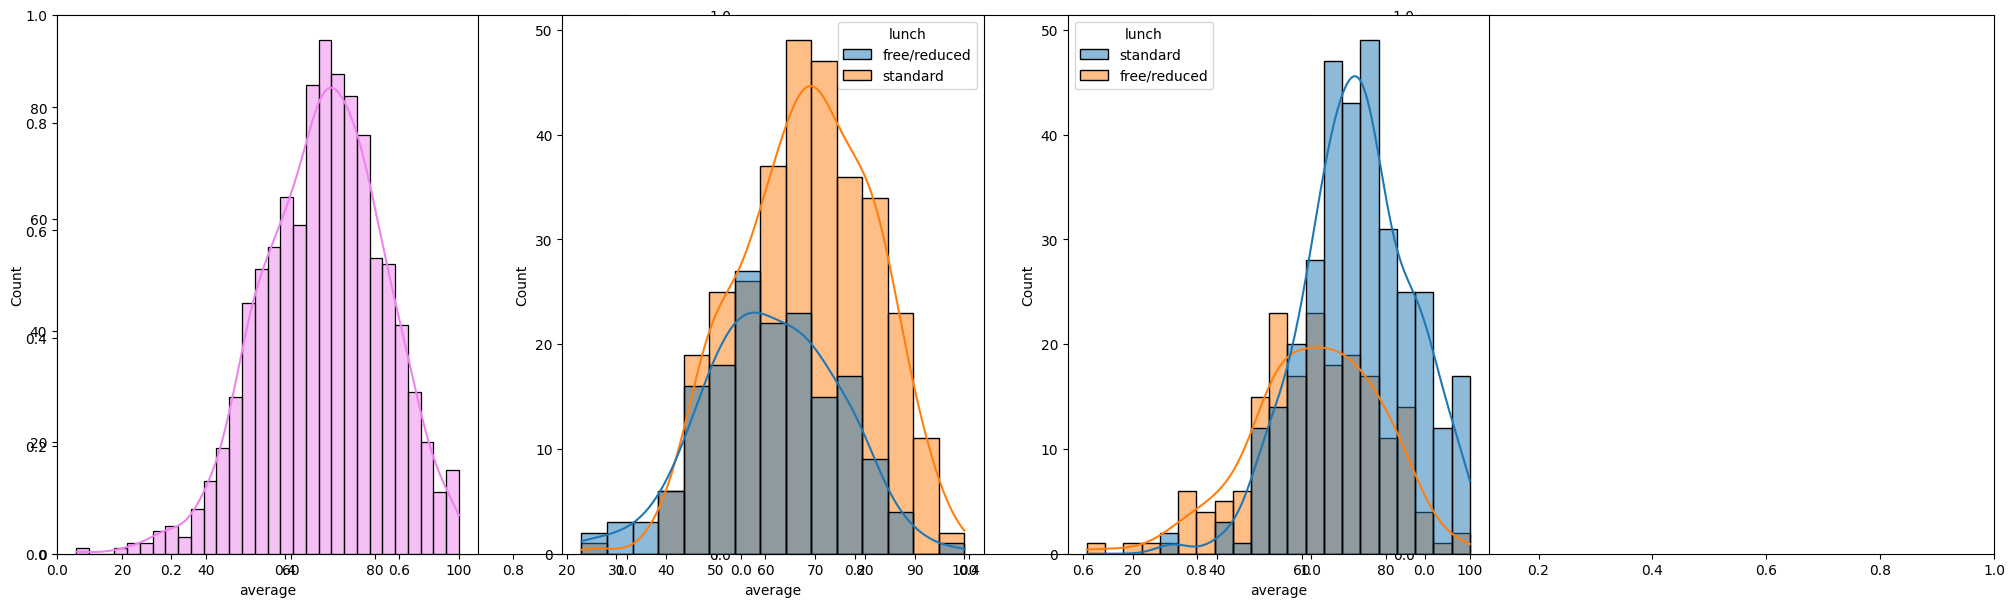

In [21]:
fig, axs=plt.subplots(1,3,figsize=(25,7))
plt.subplot(1,4,1)
sns.histplot(data=data,x='average',bins=30,kde=True,color='violet')
plt.subplot(1,4,2)
sns.histplot(data=data[data.gender=='male'],x='average',kde=True,hue='lunch')
plt.subplot(1,4,3)
sns.histplot(data=data[data.gender=='female'],x='average',kde=True,hue='lunch')

Insight : 
1. Standard lunch helps to perform well in exams.
2. Standard lunch helps to perform well in exams for both genders (Male and female).

<Axes: xlabel='average', ylabel='Count'>

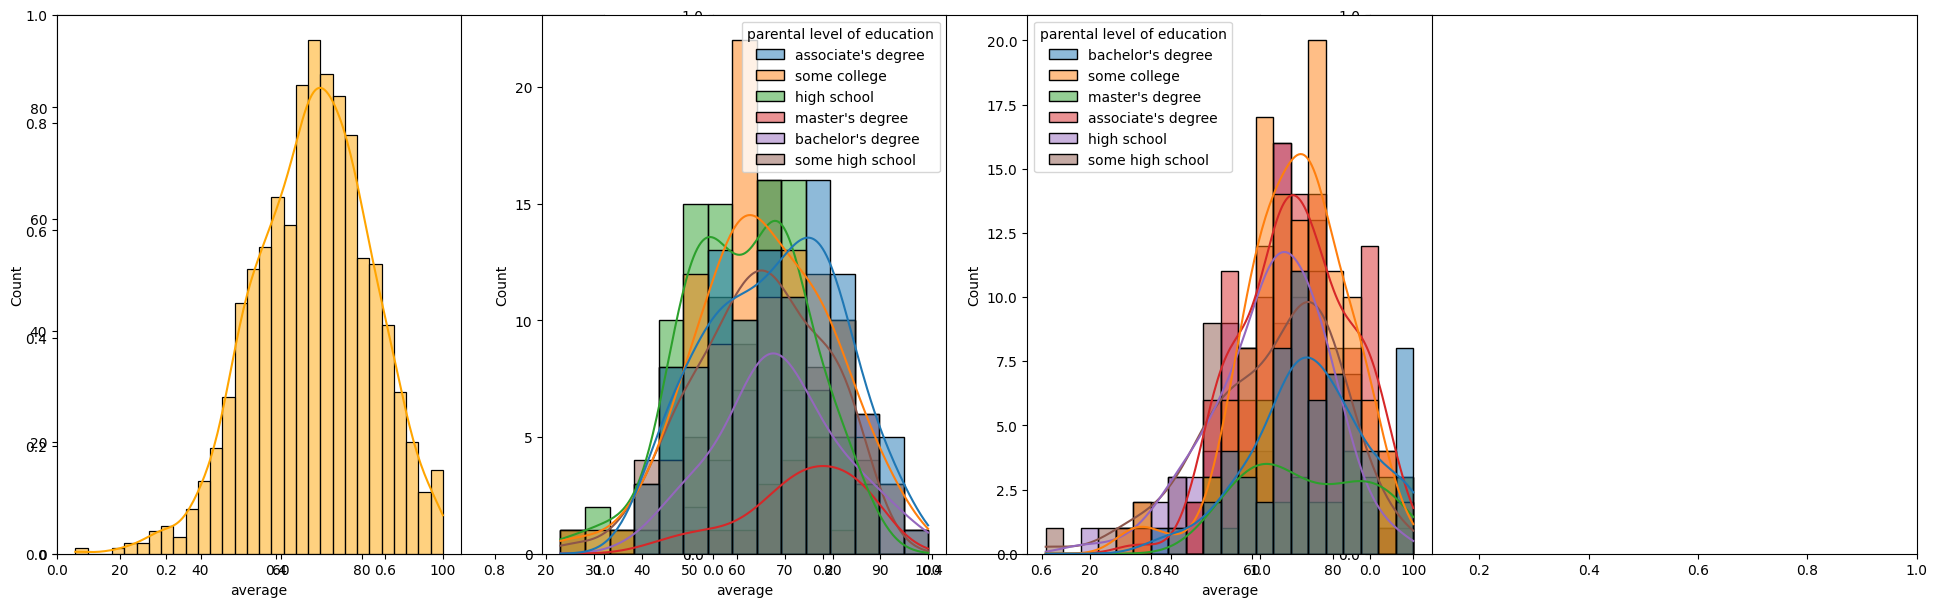

In [22]:
plt.subplots(1,3,figsize=(24,7))
plt.subplot(141)
sns.histplot(data=data,x='average',bins=30,kde=True,color='orange')
plt.subplot(142)
sns.histplot(data=data[data.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
sns.histplot(data=data[data.gender=='female'],x='average',kde=True,hue='parental level of education')

Insights :
1. In general, Parents education dont help student to perform well in exam
2. when you observe in Chart 2, we can say that whose education is of Associate's degree or master's degree their child tend to perform well in exams.
3. when you observe in chart 3, we can say that for female students has no effect with parental education.

<Axes: xlabel='average', ylabel='Count'>

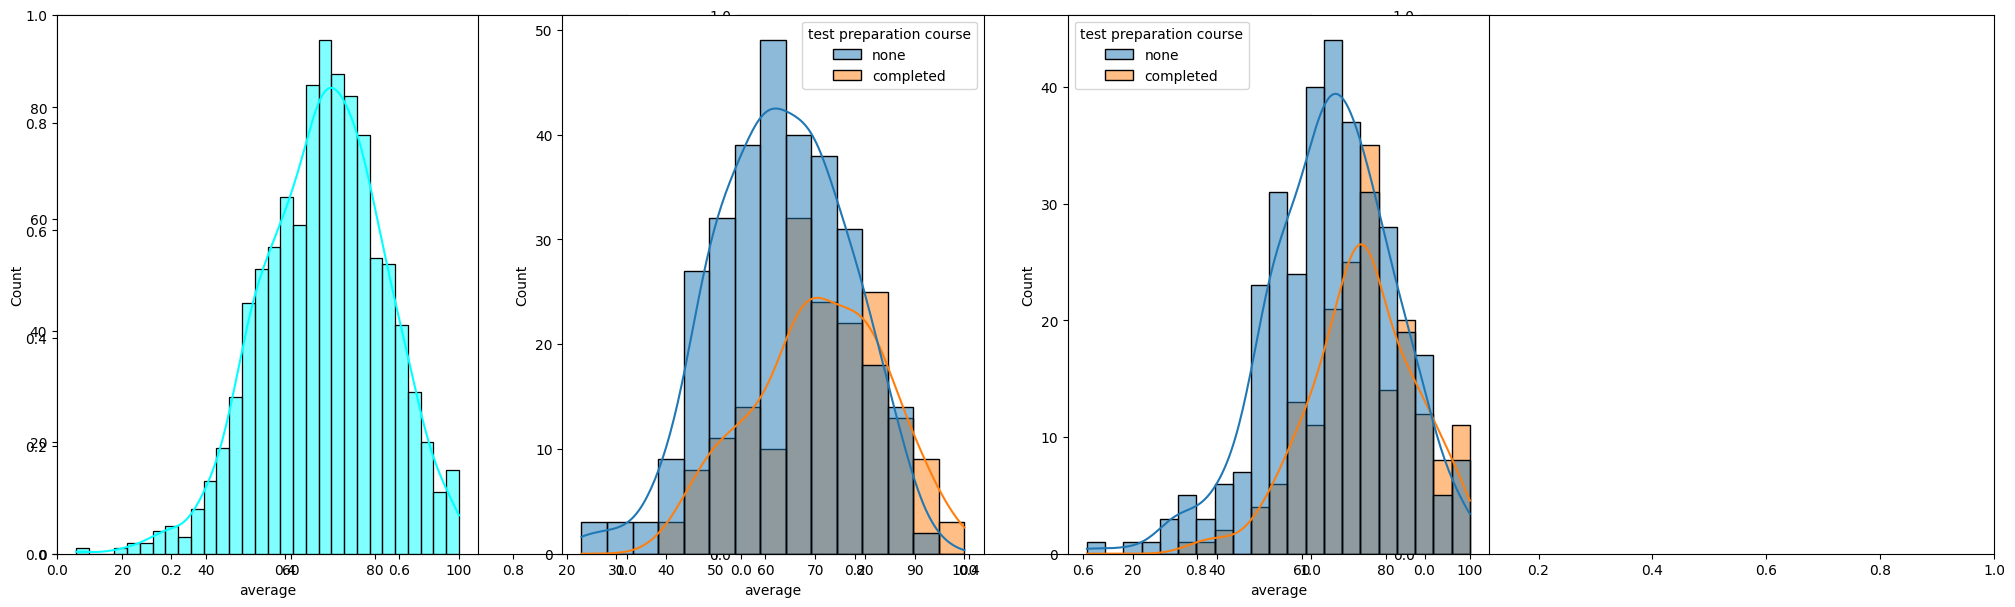

In [23]:
plt.subplots(1,3,figsize=(25,7))
plt.subplot(141)
sns.histplot(data=data,x='average',bins=30,kde=True,color='cyan')
plt.subplot(142)
sns.histplot(data=data[data.gender=='male'],x='average',kde=True,hue='test preparation course')
plt.subplot(143)
sns.histplot(data=data[data.gender=='female'],x='average',kde=True,hue='test preparation course')


Insight:
1. Students performing well in exam who are all completing the test prepartion course.

<Axes: xlabel='average', ylabel='Count'>

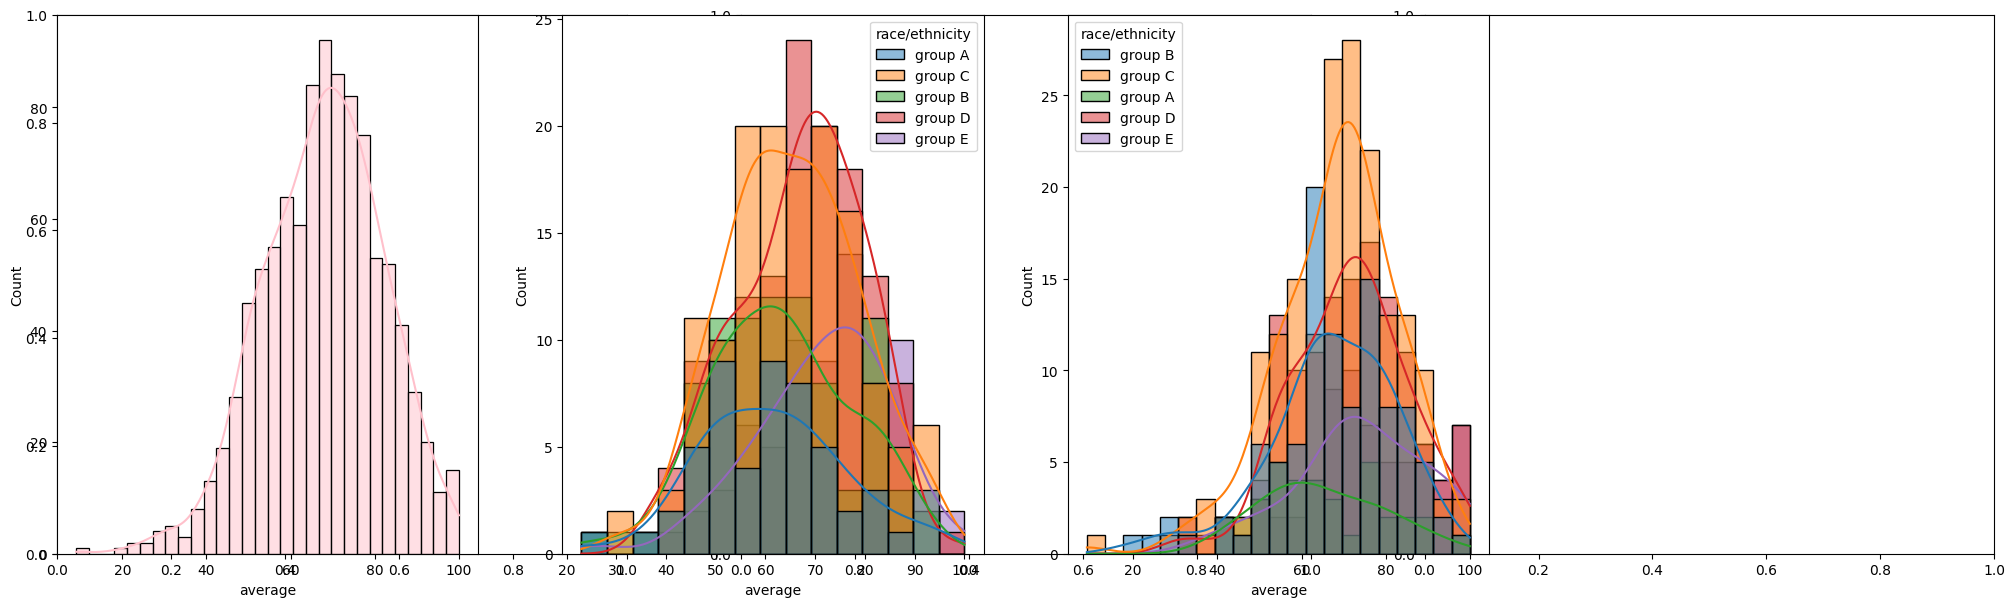

In [24]:
plt.subplots(1,3,figsize=(25,7))
plt.subplot(141)
sns.histplot(data=data,x='average',bins=30,kde=True,color='pink')
plt.subplot(142)
sns.histplot(data=data[data.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
sns.histplot(data=data[data.gender=='female'],x='average',kde=True,hue='race/ethnicity')

Insights: Students from Group B and Group C tends to perform poorly in exams.

# Maximum score of students in all three subjects (Math score, Reading score, Writing score)

<Axes: title={'center': 'Writing Score'}, ylabel='writing score'>

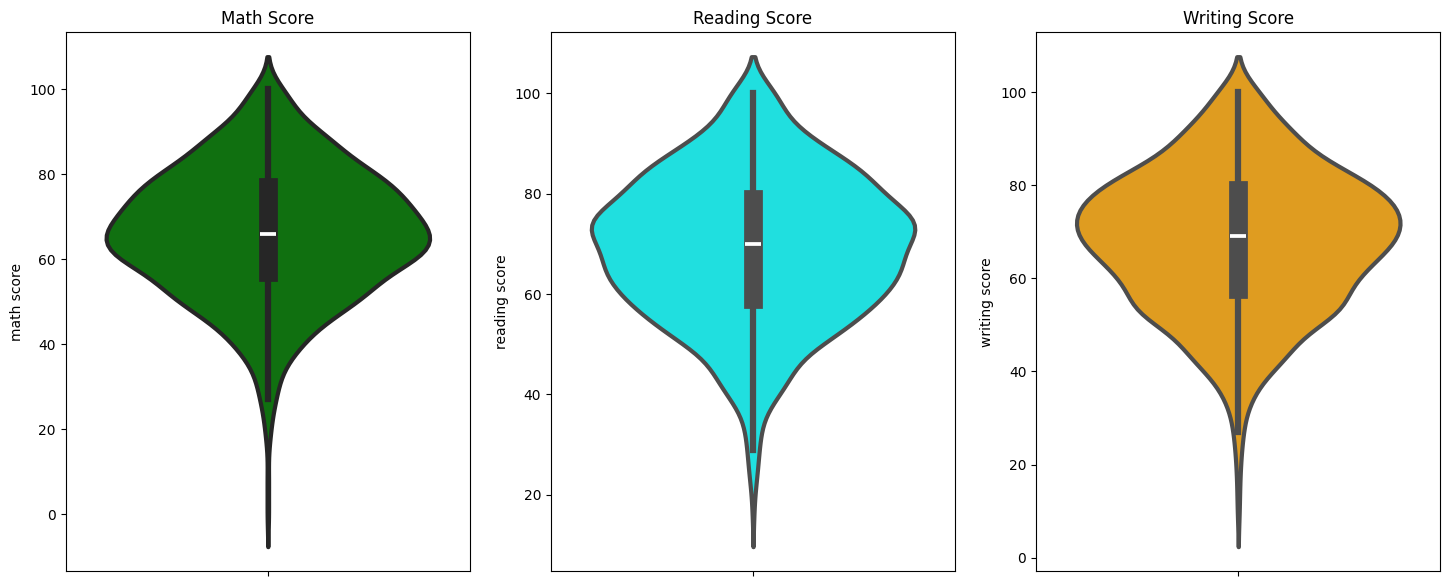

In [25]:
plt.figure(figsize=(24,7))
plt.subplot(141)
plt.title("Math Score")
sns.violinplot(y='math score',data=data,color='green',linewidth=3)
plt.subplot(142)
plt.title("Reading Score")
sns.violinplot(y='reading score',data=data,color='cyan',linewidth=3)
plt.subplot(143)
plt.title("Writing Score")
sns.violinplot(y='writing score',data=data,color='orange',linewidth=3)


(-1.25, 1.25, -1.25, 1.25)

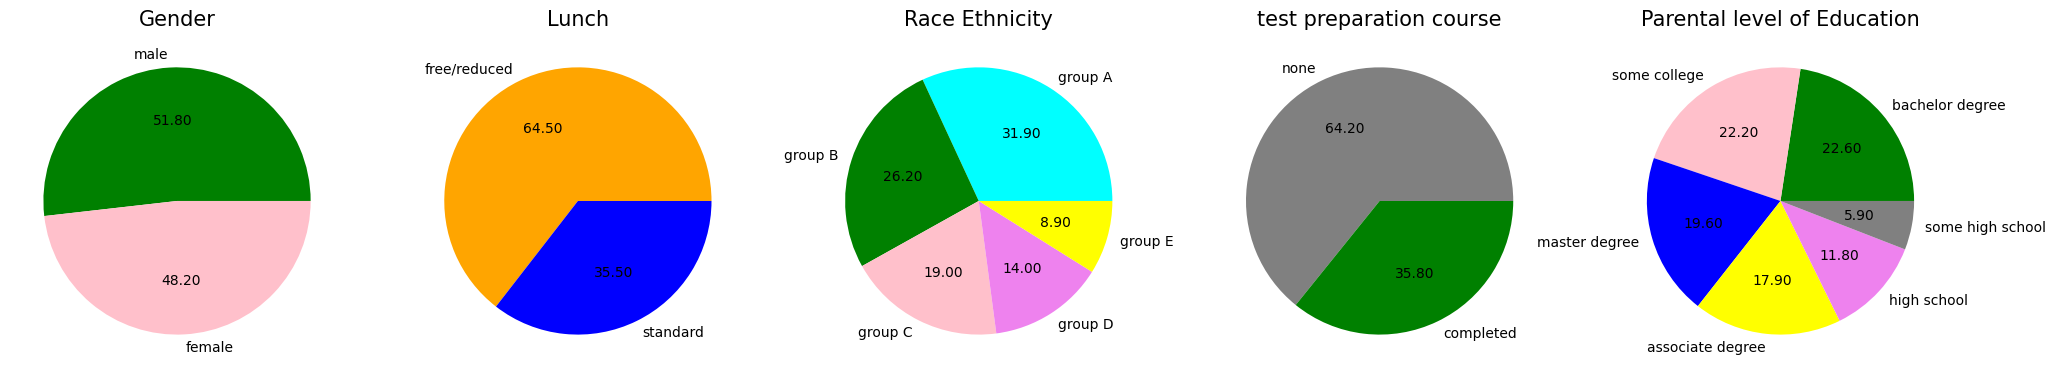

In [26]:
plt.rcParams['figure.figsize']=(25,12)

plt.subplot(151)
size=data['gender'].value_counts()
labels=['male','female']
colors=['green','pink']

plt.pie(size,colors=colors,labels=labels,autopct='%.2f')
plt.title('Gender',fontsize=15)
plt.axis('off')

plt.subplot(152)
size=data['lunch'].value_counts()
labels=['free/reduced','standard']
colors=['orange','blue']

plt.pie(size,colors=colors,labels=labels,autopct='%.2f')
plt.title('Lunch',fontsize=15)
plt.axis('off')

plt.subplot(153)
size=data['race/ethnicity'].value_counts()
labels=['group A','group B','group C','group D','group E']
colors=['cyan','green','pink','violet','yellow']
plt.pie(size,colors=colors,labels=labels,autopct='%.2f')
plt.title('Race Ethnicity',fontsize=15)
plt.axis('off')


plt.subplot(154)
size=data['test preparation course'].value_counts()
labels=['none','completed']
colors=['grey','green']
plt.pie(size,colors=colors,labels=labels,autopct='%.2f')
plt.title('test preparation course',fontsize=15)
plt.axis('off')


plt.subplot(155)
size=data['parental level of education'].value_counts()
labels=['bachelor degree','some college','master degree','associate degree','high school','some high school']
colors=['green','pink','blue','yellow','violet','grey']
plt.pie(size,colors=colors,labels=labels,autopct='%.2f')
plt.title('Parental level of Education',fontsize=15)
plt.axis('off')


Insights: 
1. No.of male and female students are almost equal
2. No.of students who have standard lunch are greater
3. No.of Students are greater in Group B race ethnicity
4. No.of Students who are not enrolled in test preparation course
5. No.of Students whose parental level of education is greater for 'Some college' and followed by 'bachelor degree'

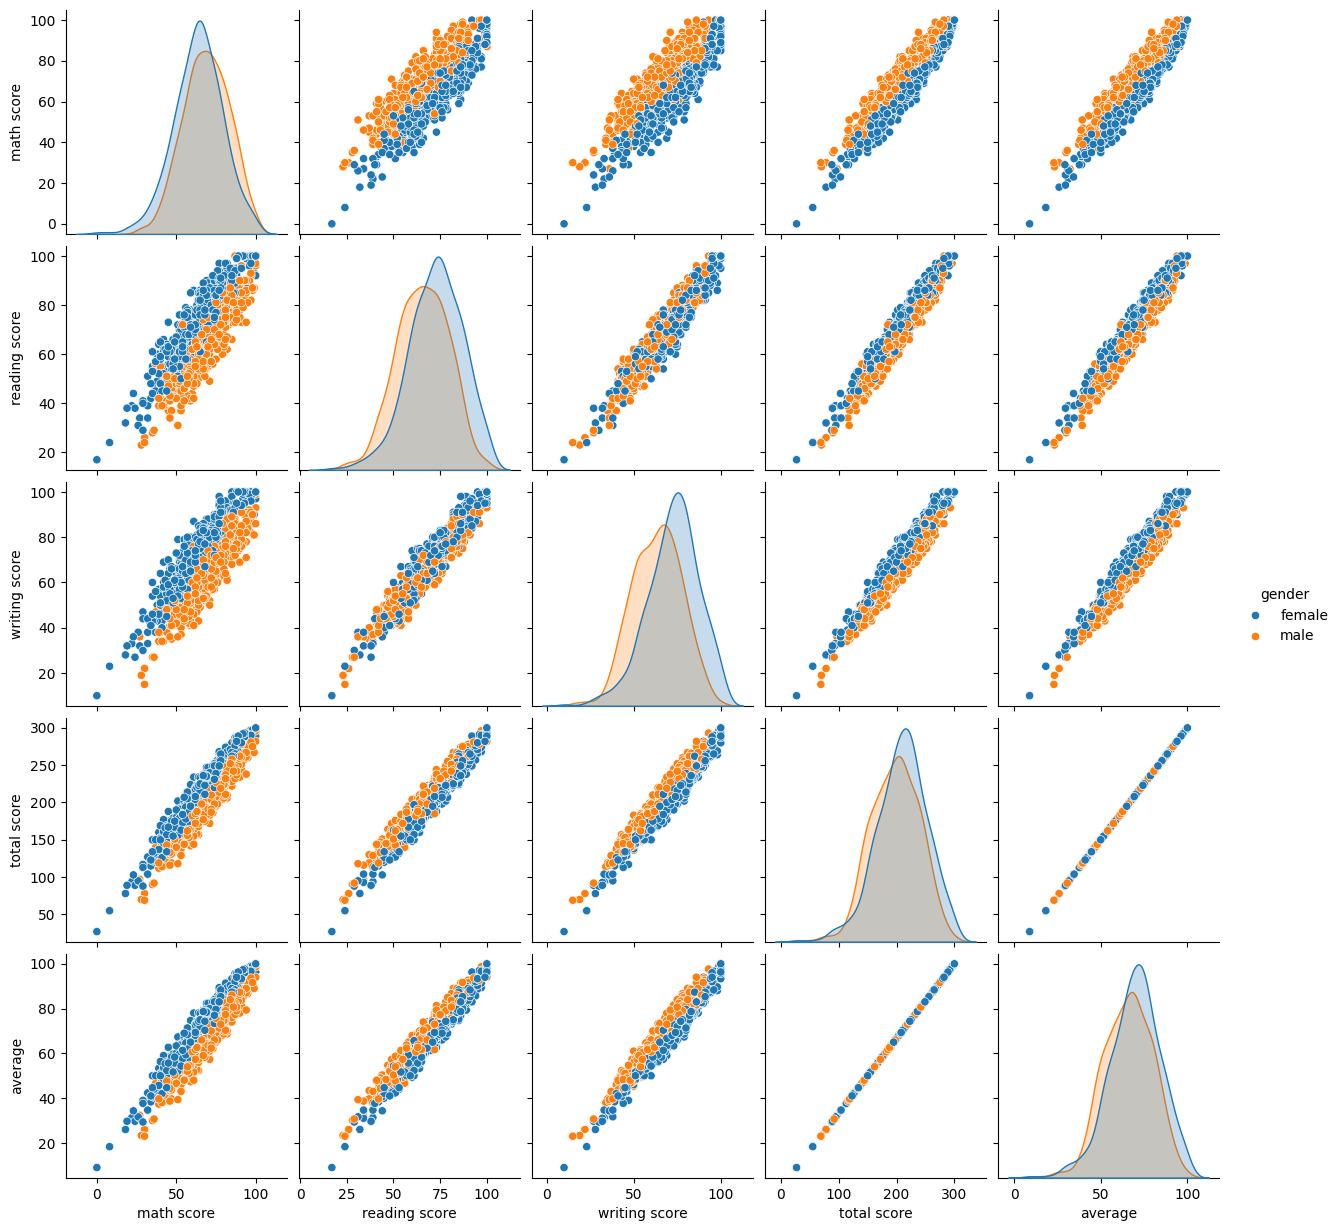

In [27]:
sns.pairplot(data,hue='gender')